# Understanding Descriptive Statistics

Import the necessary libraries here:

In [46]:
# Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import random
import pylab
import math
from itertools import groupby

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [21]:
# your code here
df = [random.randint(1,6) for x in range(10)]
df

[4, 2, 4, 1, 2, 5, 3, 2, 3, 6]

#### 2.- Plot the results sorted by value.

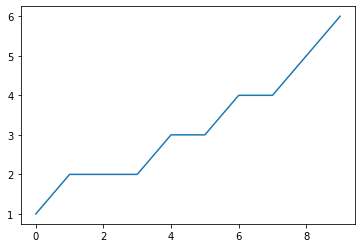

In [37]:
# your code here
df.sort()
df
plt.plot(df)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

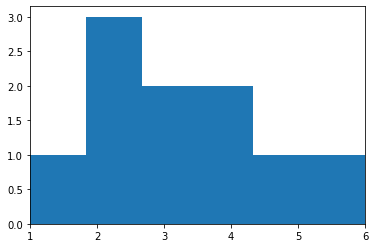

In [45]:
# your code here
pylab.hist(df, bins=6) # histogram of the outcoming
pylab.xlim(1,6)
pylab.show()

In [49]:
freq = [len(list(group)) for key, group in groupby(df)]
freq

[1, 3, 2, 2, 1, 1]

In [ ]:
"""
In both we can see the that the dice rolled 10 times but in the first plot you can't tell how many times each number "showed up"
In the end the second plot does give more information

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [53]:
# your code here
mean_dice = sum(df)/len(df)
mean_dice

3.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [54]:
# your code here
mean_freq = sum(freq)/len(freq)
mean_freq

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [58]:
# your code here
print(df)

[1, 2, 2, 2, 3, 3, 4, 4, 5, 6]


In [57]:
def median(lst):
    n = len(lst)
    s = sorted(lst)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None

median(df)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [64]:
# your code here
def quartiles(lst):
    q25 = median(lst)/2
    q50 = median(lst)
    q75 = median(lst)+q25
    q100 = median(lst)+median(lst)
    print("q25 is:",q25," - ", "q50 is:",q50," - ","q75 is:",q75," - ","q100 is:",q100)
    
quartiles(df)

q25 is: 1.5  -  q50 is: 3.0  -  q75 is: 4.5  -  q100 is: 6.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [80]:
# your code here
data = pd.read_csv('../data/roll_the_dice_hundred.csv')
data.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [87]:
data.shape

(100, 3)

In [86]:
data.columns

Index(['Unnamed: 0', 'roll', 'value'], dtype='object')

In [85]:
data['value'].sort_values
data.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


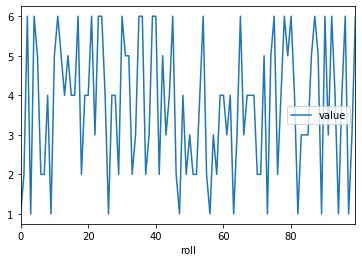

In [101]:
#plt.plot(data)
data.plot(x="roll", y="value")

In [ ]:
"""
I don't see much. The dice rolled 100 times and the values are mixed.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [108]:
# your code here

mean_dice = data[['value']].sum()/100
mean_dice

value    3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [113]:
# your code here

fre = data['value'].value_counts()
print(fre)

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(0, 0.5, 'Value')

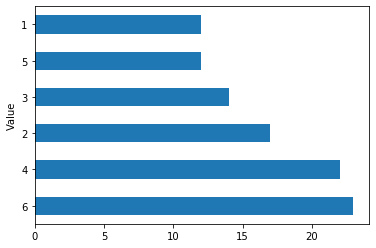

In [122]:
# your code here
#plt.hist(fre, bins=23)
#plt.ylabel('value')
#plt.show()

# I didn't like my histogram

fre.plot.barh()
plt.ylabel('Value')

In [ ]:
"""
mean value is 3.74
I can see that 1 and 5 didn't come up a lot but 4 and 6 did.
I think that 3.74 reflects a good mean

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [125]:
# your code here
data = pd.read_csv('../data/roll_the_dice_thousand.csv')
data.head(10)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


In [126]:
data.shape

(1000, 3)

In [127]:
mean_dice2 = data[['value']].sum()/1000
mean_dice2

value    3.447
dtype: float64

In [128]:
fre2 = data['value'].value_counts()
print(fre2)

3    175
1    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64


Text(0, 0.5, 'Value')

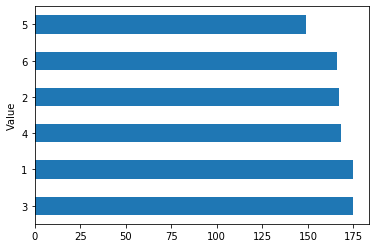

In [129]:
fre2.plot.barh()
plt.ylabel('Value')

In [ ]:
"""
Now the distribution is very similar but the dice rolled 10 times more, thats why the graph changed
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [130]:
# your code here
data = pd.read_csv('../data/ages_population.csv')
data.head(10)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


In [139]:
data.shape

(1000, 1)

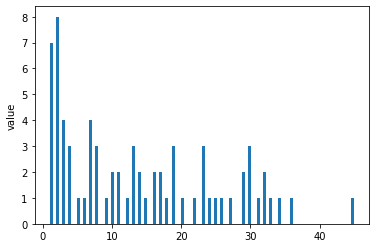

In [141]:
fre = data['observation'].value_counts()
fre
plt.hist(fre, bins=100)
plt.ylabel('value')
plt.show()

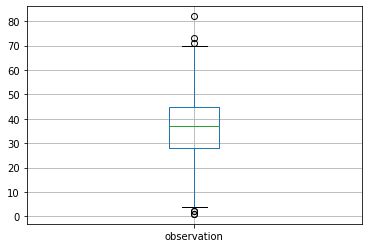

In [134]:
import matplotlib
%matplotlib inline

data.boxplot()  # mean age is around 36, the range is between 70 and 5, so its 65

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [135]:
# your code here
data.mean()

observation    36.56
dtype: float64

In [137]:
data.std()

observation    12.8165
dtype: float64

In [ ]:
"""
my guess for the mean was good
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

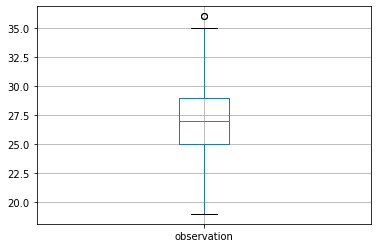

In [144]:
# your code here
data = pd.read_csv('../data/ages_population2.csv')
data.head(10)
fre = data['observation'].value_counts()
#fre
import matplotlib
%matplotlib inline

data.boxplot()

In [145]:
data.shape

(1000, 1)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The people in this sample are younger and the range is smaller.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [146]:
# your code here
data.mean()

observation    27.155
dtype: float64

In [147]:
data.std()

observation    2.969814
dtype: float64

In [ ]:
"""
The average age is younger commpared to the people in the other dataset and the standard deviation is smaller, also the range is smaller.
The people in the second sample have kind of a similar age.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

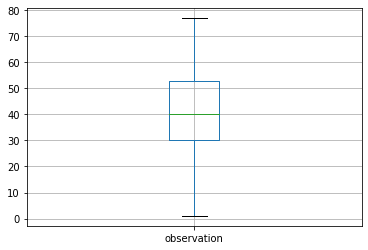

In [148]:
# your code here
# your code here
data = pd.read_csv('../data/ages_population3.csv')
data.head(10)
fre = data['observation'].value_counts()
#fre
import matplotlib
%matplotlib inline

data.boxplot()

In [149]:
data.shape

(1000, 1)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [150]:
# your code here
data.mean()

observation    41.989
dtype: float64

In [151]:
data.std()

observation    16.144706
dtype: float64

In [ ]:
"""
now the average age increased and also the standard deviation, also the range increased. Age between 1-78. Before it was between 5 and 70
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [153]:
# your code here

print(data.quantile(0.25))
print(data.quantile(0.5))
print(data.quantile(0.75))
print(data.quantile(1))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    77.0
Name: 1, dtype: float64


In [ ]:
"""
The difference between median (40.0) and mean(41.989) is not that big. The range increased. 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [154]:
# your code here
print(data.quantile(0.1))

observation    22.0
Name: 0.1, dtype: float64


In [ ]:
"""
So I would think that there are not a lot of people in a very young age.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""